# Task 1

## Feature Selection

**author:** "Gökberk Abdullah" 

**school number:** "090170341"

**date:** "March 20, 2023"

**Task 1:** Find a data set which is suitable for regression analysis and consists of at least 6-7 numerical features only. 
Check for possible multicollinearity problems in the data set and remedy this problem if it exists.
Then, apply feature selection algorithms to find the best subset. Explain the reason (give support) why you picked that model as the final one.

#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

## Data Decription

Concrete Compressive Strength dataset is used to show the relationship between various properties related to the components and processing conditions of concrete and its compressive strength. The dataset was prepared by researchers at the Istanbul Technical University and is available at the UCI Machine Learning Depository.

The dataset consists of 1030 concrete samples prepared using the vortex mixing method and contains 9 features/columns. These features are:

* cement: Cement (kg/m³)
* slag: Blast Furnace Slag (kg/m³)
* ash: Fly Ash (kg/m³)
* water: Water (kg/m³)
* superplastic: Superplasticizer (kg/m³)
* coarseagg: Coarse Aggregate (kg/m³)
* fineagg: Fine Aggregate (kg/m³)
* age: Age of concrete specimen in days (days)
* strength: Compressive Strength (MPa)

This dataset can be used in machine learning and data analysis applications. Specifically, regression models (linear, multiple, etc.) can be used to predict the compressive strength of concrete. The features in this dataset provide information about the components and processing conditions of concrete and are related to factors that affect its compressive strength. Therefore, this dataset can be used in many areas, such as quality control studies in the concrete industry and the development of new concrete mixtures.


Let's import the necessary libraries:

In [31]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

Let's go to the datasets folder and read our data with the help of ```pandas``` library.

In [2]:
file_path = os.path.join("datasets", "concrete_data.csv")

df = pd.read_csv(file_path)
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


I use ```df.info()``` function for more details.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are no missing values ​​in our data.

In [3]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

## Multicollinearity Check

Let's divide our data into train and test. Since there is little data, it makes more sense to set the test portion as 10 percent.

In [3]:
X = df.drop(columns=["concrete_compressive_strength"], axis=1)
y = df['concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

I visualized the table showing the correlation between the columns in the X_train. Here, the ```figure()``` part shows the size of the graph. 

Various parameters in ```sns.heatmap()``` add different details to the graph.

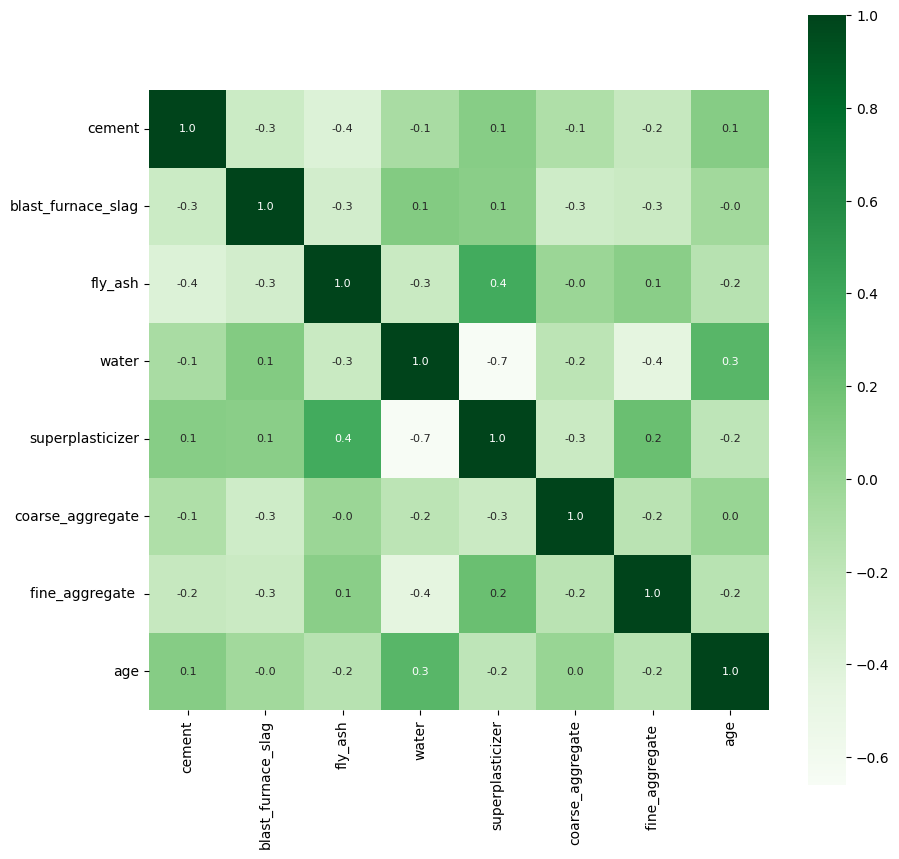

In [4]:
correlation=X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens');

VIF is a statistical measure that measures how strongly a feature is explained by other features. High VIF values ​​may reduce the reliability of multiple linear regression models in the presence of multiple independent variables in multiple linear regression models. In this method we applied for multicollinearity control, columns with a VIF value above 5 lead to multicollinearity. 

For this, it is necessary to use the ```variance_inflation_factor``` from the statsmodels library.

In [5]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,15.189112,cement
1,3.421428,blast_furnace_slag
2,4.010062,fly_ash
3,83.750778,water
4,5.424157,superplasticizer
5,85.093812,coarse_aggregate
6,72.326894,fine_aggregate
7,1.709417,age


We proceed by deleting the largest values ​​with a VIF value above 10 one by one.

In [7]:
new_X_train = X_train.drop('coarse_aggregate', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_X_train.values, i) for i in range(new_X_train.shape[1])]
vif["features"] = new_X_train.columns
vif

,VIF Factor,features
0,14.341756,cement
1,3.402923,blast_furnace_slag
2,3.857448,fly_ash
3,72.822975,water
4,5.375909,superplasticizer
5,48.720967,fine_aggregate
6,1.709409,age


In [8]:
new2_X_train = new_X_train.drop('water', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new2_X_train.values, i) for i in range(new2_X_train.shape[1])]
vif["features"] = new2_X_train.columns
vif

,VIF Factor,features
0,9.297106,cement
1,2.138895,blast_furnace_slag
2,2.853819,fly_ash
3,2.910263,superplasticizer
4,13.989696,fine_aggregate
5,1.584482,age


In [9]:
new3_X_train = new2_X_train.drop('fine_aggregate ', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new3_X_train.values, i) for i in range(new3_X_train.shape[1])]
vif["features"] = new3_X_train.columns
vif

,VIF Factor,features
0,2.807386,cement
1,1.568018,blast_furnace_slag
2,1.854129,fly_ash
3,2.893675,superplasticizer
4,1.560248,age


We drop ```fine aggregate``` , ```water``` , ```coarse aggregate``` columns from our X_train and X_test datasets.

In [6]:
X_train_final = X_train.drop(columns=['fine_aggregate ', 'water','coarse_aggregate'], axis=1)
X_test_final = X_test.drop(columns=['fine_aggregate ', 'water','coarse_aggregate'], axis=1)

## Feature Selection

XGBRegressor is a regression model that works with the Gradient Boosting method. This model performs particularly well in high-dimensional and complex data and often provides better results than other regression models.

XGBRegressor uses an ensemble method that combines multiple decision trees. This allows the model to make more accurate predictions and prevent overfitting.

This code block uses a regression model named "XGBRegressor" and a feature selection algorithm called "EFS" (Exhaustive Feature Selection) to find the best feature set in a dataset.

In the first line of the code, the training data containing the features and the target variable (```X_train_final``` and ```y_train```) is specified.

In the second line, the "EFS" algorithm is defined. The ```min_features``` and ```max_features``` arguments determine the lower and upper bounds of the number of features that can be selected. The ```scoring``` argument specifies the metric to be used. In this code block, the ```r2``` metric is used to evaluate the performance of the models. The ```print_progress``` argument shows the progress status on the screen during the feature selection process.

Finally, the feature selection process is performed using the ```efs.fit``` method. This process determines the best feature set by trying all possible feature combinations.

In conclusion, this code block is used to find the best feature set in a dataset using the XGBRegressor model and the EFS algorithm.

In [25]:
xgbr=XGBRegressor()
efs = EFS(xgbr, min_features=1, max_features=5, scoring='r2', print_progress=True)
efs.fit(X_train_final, y_train)

Features: 31/31

Best R2 score on training data with best subset of size 4: 0.91
Best subset (column names): ('cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age')
Best subset index: (0, 1, 2, 3, 4)


In [30]:
print('Best R2 score on training data with combination all columns: %.2f' % efs.best_score_)
print('Best subset (column names):', efs.best_feature_names_)

Best R2 score on training data with combination all columns: 0.91
Best subset (column names): ('cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age')


The model we built when the data was in its initial state and its results:

In [44]:
model = xgbr.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE score:',mean_squared_error(y_test, y_pred))

R2 Score: 0.9253224671705821
MSE score: 21.452464397114458


Our xgbregressor model, which was installed after the multicollinearity problem was removed from the data and the feature selection was made:

In [42]:
model = xgbr.fit(X_train_final,y_train)
y_pred = model.predict(X_test_final)
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE score:',mean_squared_error(y_test, y_pred))

R2 Score: 0.8924860065922353
MSE score: 30.88532826921526


## Conclusion

Multicollinearity is a problem that can make it difficult to make reliable predictions in regression models. Therefore, the presence of this problem in the dataset requires models to be optimized in order to obtain accurate results.

When we look at the two models, we see that the model with an r2 score of 92 and an mse score of 21 performs better. However, the presence of multicollinearity in this model may increase the likelihood of overfitting. This means that the model may overfit to the training data and perform worse on the test data.

On the other hand, the model with an r2 score of 89 and an mse score of 30 may be a more generalizable model because it eliminates the multicollinearity problem. This model may perform better on more diverse examples of the dataset. For this reason, I prefer the second algorithm, which eliminates the multicollinearity problem.